In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Pendahuluan
data ini merupakan data yang menceritakan bahwa pengaruh pendapatan penjualan (CUAN) terhadap promosi dengan melalaui media periklan

# Load Data 

In [20]:
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Koran,Revenue
0,2301.0,378.0,692,221000.0
1,445.0,393.0,451,104000.0
2,172.0,459.0,693,120000.0
3,1515.0,413.0,585,165000.0
4,1808.0,108.0,584,179000.0


# Data Cleaning And Feature

kita mencari data yang ada

In [21]:
data.describe()

,TV,Radio,Koran,Revenue
count,206.000000,206.000000,207.000000,205.000000
mean,1470.412621,230.703883,304.685990,151765.853659
std,860.018916,148.709160,216.685161,52610.330426
min,7.000000,0.000000,3.000000,16000.000000
25%,737.250000,99.250000,127.000000,110000.000000
50%,1497.500000,220.000000,256.000000,160000.000000
75%,2194.750000,364.500000,451.000000,192000.000000
max,2964.000000,496.000000,1140.000000,270000.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       206 non-null    float64
 1   Radio    206 non-null    float64
 2   Koran    207 non-null    int64  
 3   Revenue  205 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.6 KB


nah dari itu disana adanya nilai yang nan,solusi itu yaitu membuang data yang kurang lengkap

In [23]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       204 non-null    float64
 1   Radio    204 non-null    float64
 2   Koran    204 non-null    int64  
 3   Revenue  204 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


untuk mengecheck lagi dengan cara mengdrop data itu

In [24]:
sum(data.duplicated())
data.drop_duplicates(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       200 non-null    float64
 1   Radio    200 non-null    float64
 2   Koran    200 non-null    int64  
 3   Revenue  200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 7.8 KB


In [26]:
data.columns

Index(['TV', 'Radio', 'Koran', 'Revenue'], dtype='object')

<AxesSubplot: xlabel='Koran', ylabel='Revenue'>

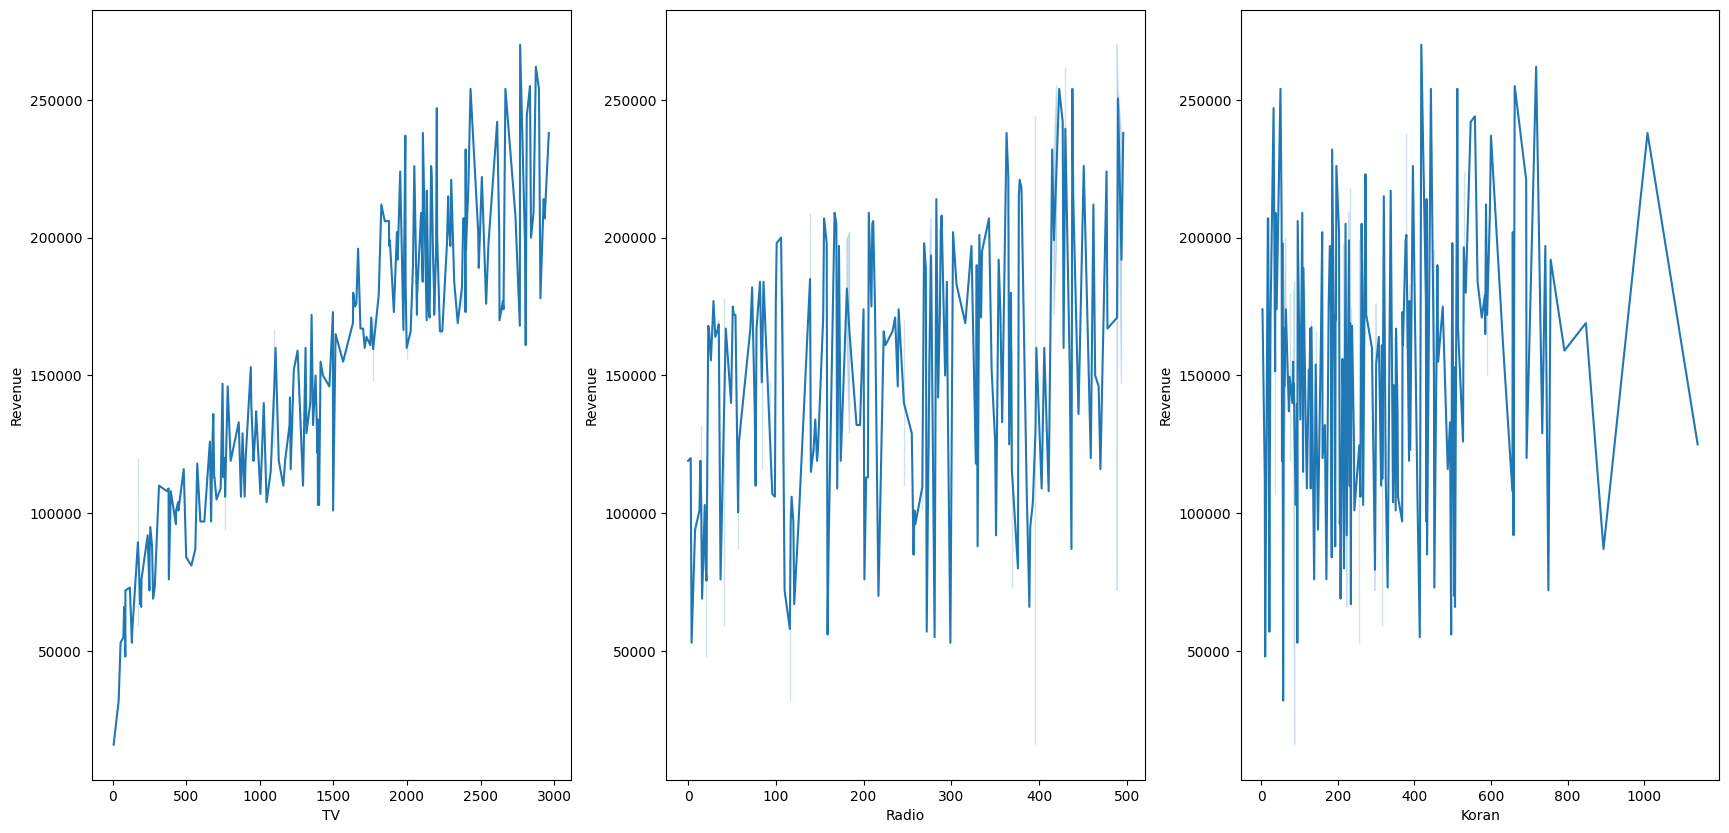

In [27]:
fig,ax=plt.subplots(1,3,figsize=(21,10))
sns.lineplot(data=data,x=data.TV,y=data.Revenue,ax=ax[0])
sns.lineplot(data=data,x=data.Radio,y=data.Revenue,ax=ax[1])
sns.lineplot(data=data,x=data.Koran,y=data.Revenue,ax=ax[2])

ini visualisasi media iklan terhadap harga penjualan

# Uji Normalitas Distribusi

/tmp/ipykernel_10629/2580149322.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.TV,ax=ax[0])
/tmp/ipykernel_10629/2580149322.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.Radio,ax=ax[1])
/tmp/ipykernel_10629/2580149322.py:5: UserWarning: 

`distplot` is a deprecated funct

<AxesSubplot: xlabel='Revenue', ylabel='Density'>

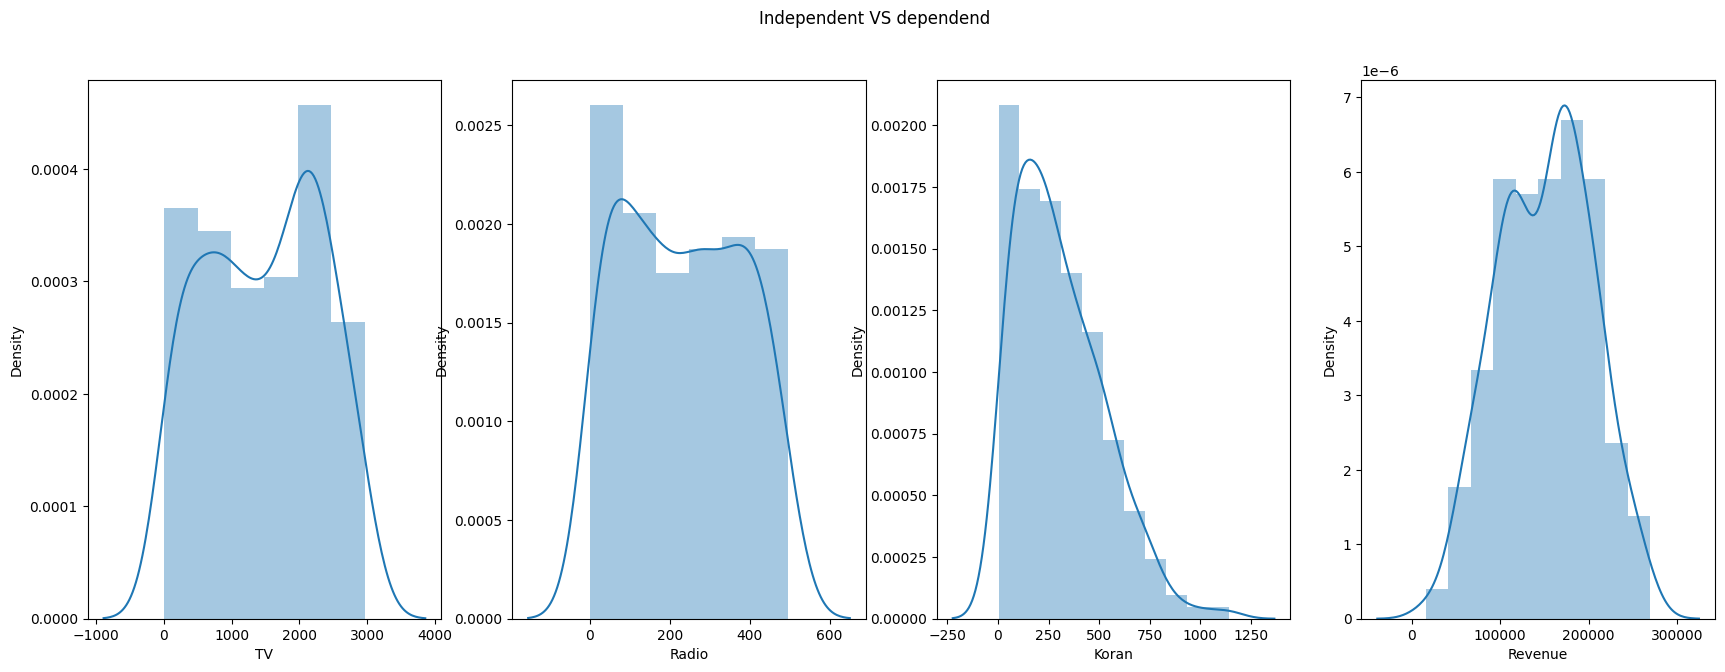

In [28]:
fig,ax=plt.subplots(1,4,figsize=(21,7))
plt.suptitle('Independent VS dependend')
sns.distplot(a=data.TV,ax=ax[0])
sns.distplot(a=data.Radio,ax=ax[1])
sns.distplot(a=data.Koran,ax=ax[2])
sns.distplot(a=data.Revenue,ax=ax[3])

data yang kita dapat bahwa semua data kecuali Koran memiliki sifat distribusi normal
dan koran ini hanya data yang ke condong ke kiri

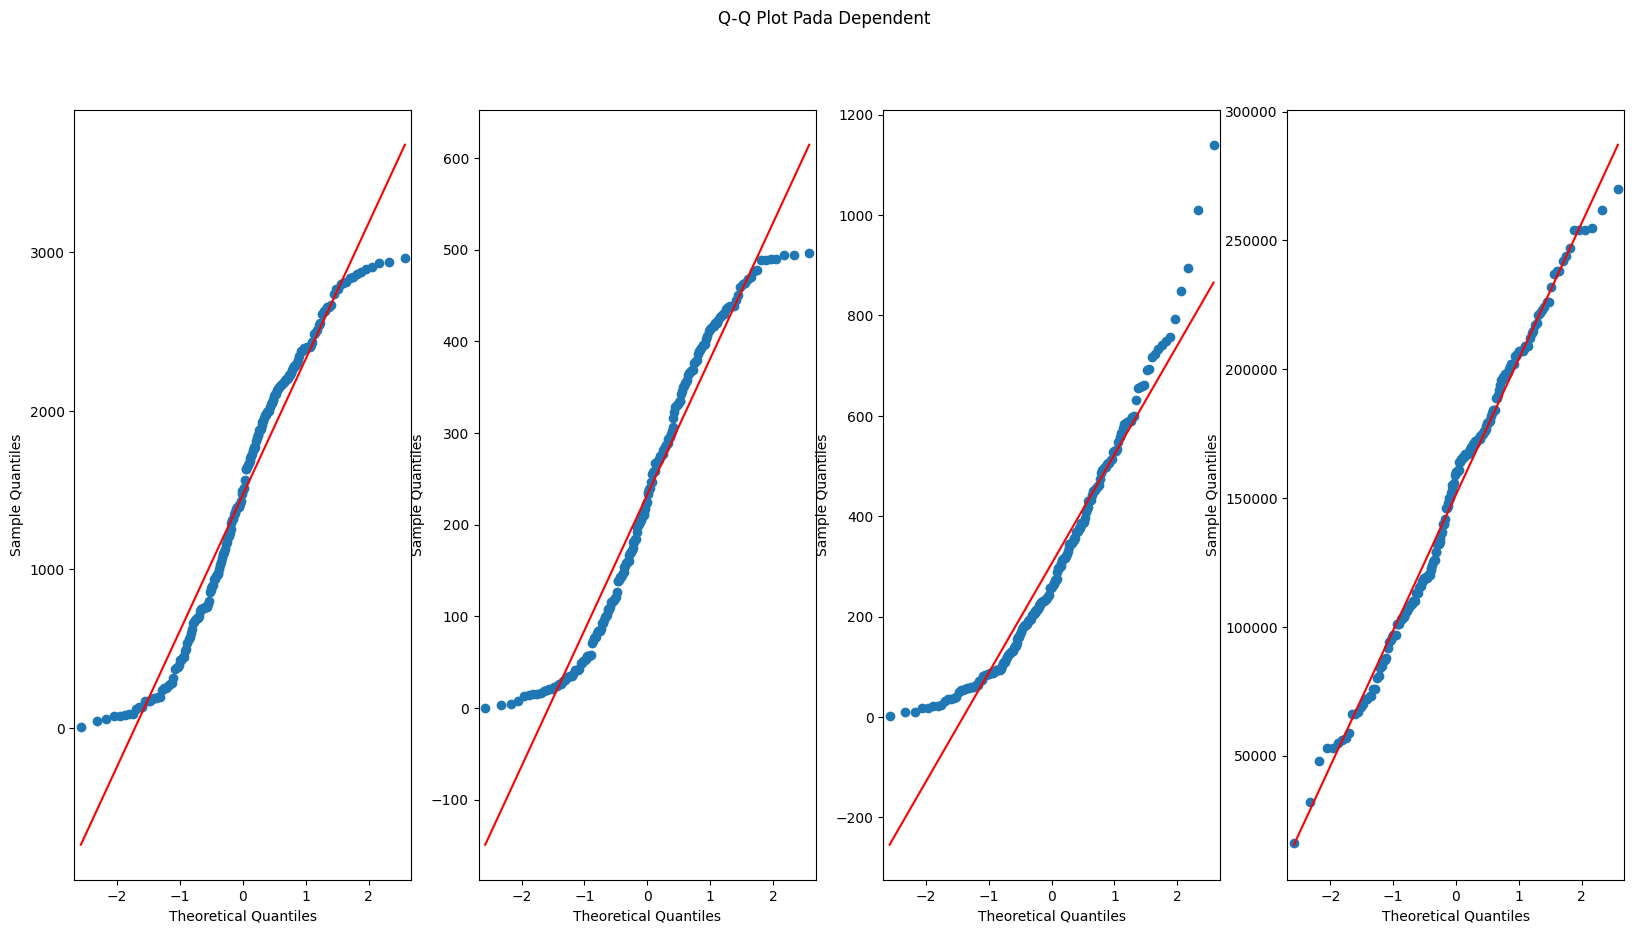

In [29]:
fig,axes=plt.subplots(1,4,figsize=(20,10))
sm.graphics.qqplot(data.TV,ax=axes[0],line='s') # ini untuk TV
sm.graphics.qqplot(data.Radio,ax=axes[1],line='s') # ini untuk Radio
sm.graphics.qqplot(data.Koran,ax=axes[2],line='s') # ini Koran
sm.graphics.qqplot(data.Revenue,ax=axes[3],line='s') # ini Pendapatan
plt.suptitle('Q-Q Plot Pada Dependent')
plt.show()

dari q-q plot ini bahwa kita mengetahui bahwa featuare ini dari radio memiliki data outlier yang sangat tinggi terhadap garis standard deviations.
kita tidak membutuhkan fitur koran

Text(0.5, 0.98, 'Dependend VS Independen')

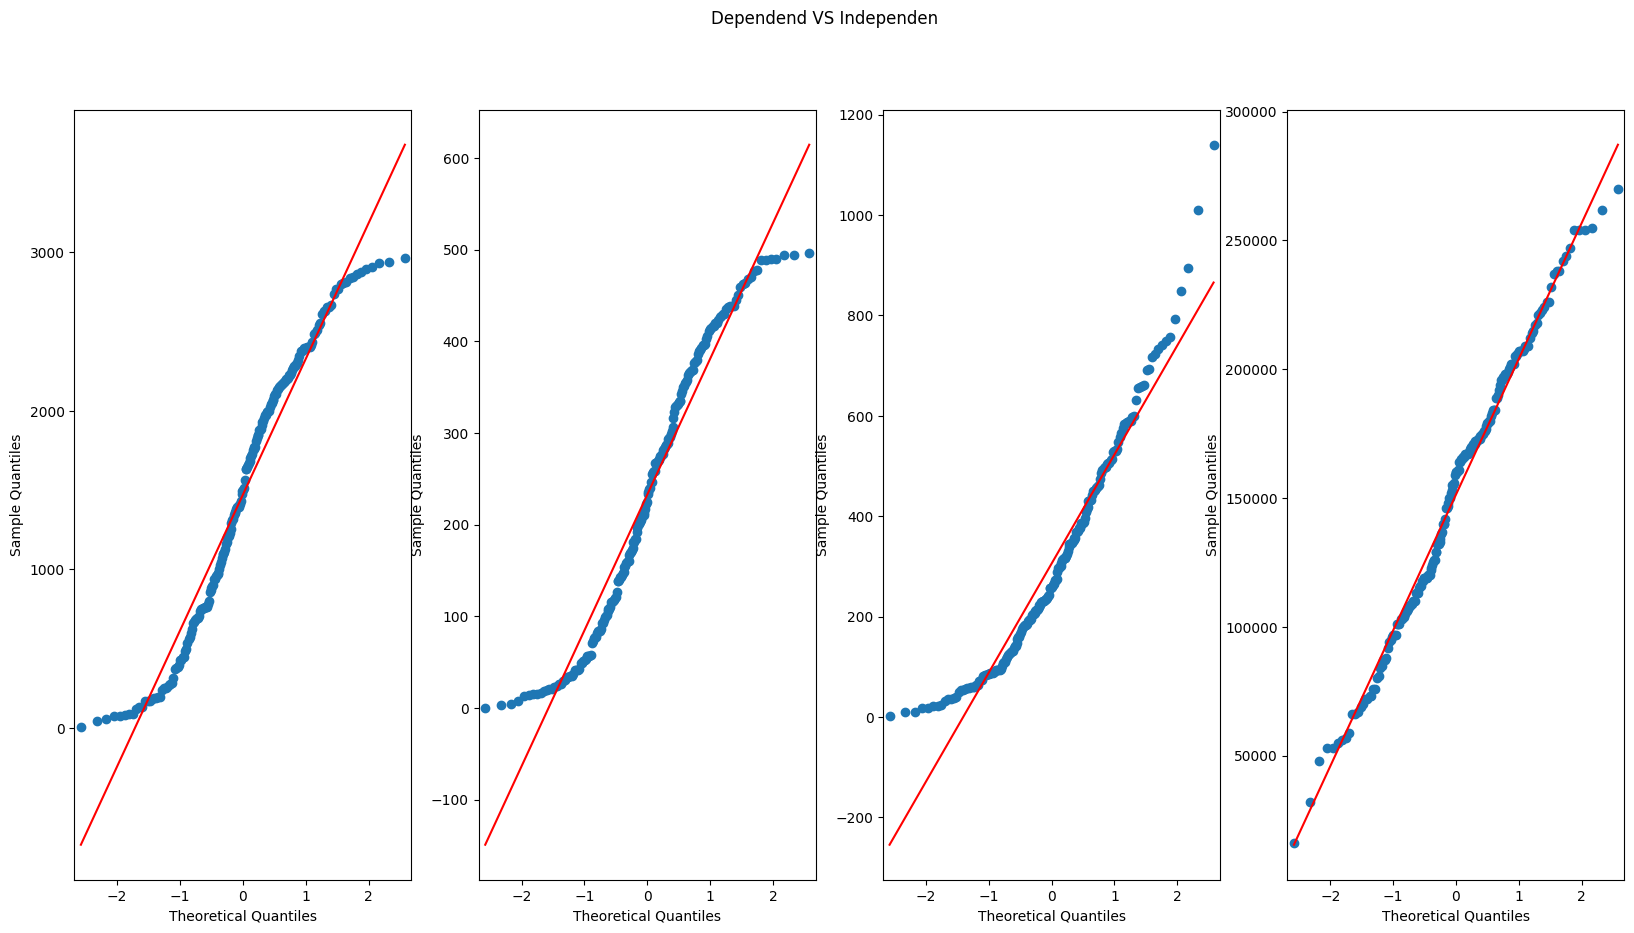

In [30]:
fig,axes=plt.subplots(1,4,figsize=(20,10))
sm.graphics.qqplot(data.TV,ax=axes[0],line='s') # ini untuk TV
sm.graphics.qqplot(data.Radio,ax=axes[1],line='s') # ini untuk Radio
sm.graphics.qqplot(data.Koran,ax=axes[2],line='s') # ini Koran
sm.graphics.qqplot(data.Revenue,ax=axes[3],line='s') # ini Koran
plt.suptitle('Dependend VS Independen')


# Multi Korelation


<AxesSubplot: >

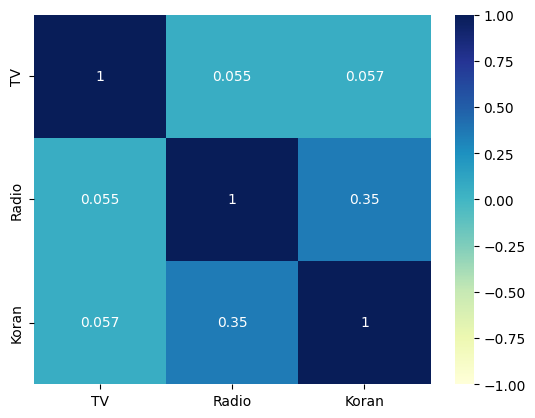

In [31]:
sns.heatmap(data.drop('Revenue',axis=1).corr(),vmax=1,vmin=-1,cmap='YlGnBu',annot=True)

# test regesi
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
ini lebih ke membuat std normali

In [32]:
# kita lakukan memperkecilkan data
from sklearn.preprocessing import StandardScaler
skala=StandardScaler().fit_transform(data)
skala_df=pd.DataFrame(skala,columns=data.columns)
skala_df.head()

,TV,Radio,Koran,Revenue
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


Lakukan dengan OLS

In [33]:
x=skala_df.drop('Revenue',axis=1).values
y=skala_df.Revenue.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('panjang x_train',format(len(x_train)))


panjang x_train 160


Regesi

In [34]:
simple_reg=sm.OLS(y_train,x_train).fit()
result=simple_reg.summary()
print(result)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              551.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                    3.92e-83
Time:                        21:48:46   Log-Likelihood:                         -26.598
No. Observations:                 160   AIC:                                      59.20
Df Residuals:                     157   BIC:                                      68.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

karena feature - yaitu pafa coef dan nilai t


In [35]:
regestion=sm.OLS(y_train,x_train[:,:2])
result=regestion.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              830.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                    1.43e-84
Time:                        21:48:46   Log-Likelihood:                         -26.777
No. Observations:                 160   AIC:                                      57.55
Df Residuals:                     158   BIC:                                      63.70
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# kita uji Klasik

/tmp/ipykernel_10629/1825475075.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


<AxesSubplot: ylabel='Density'>

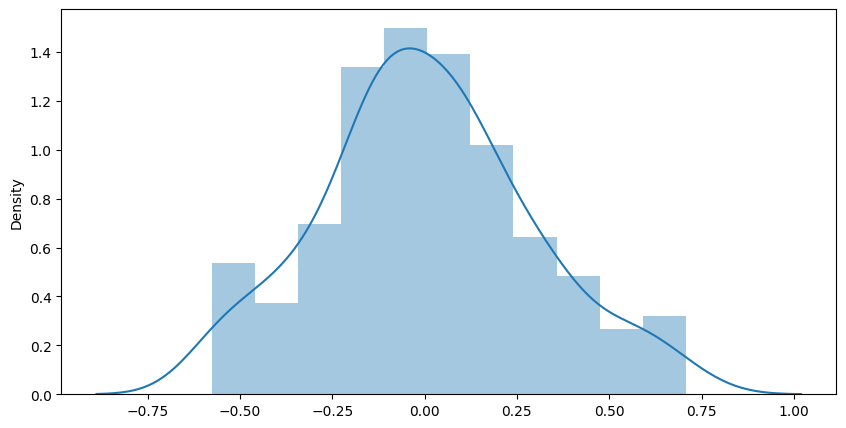

In [36]:
# kita menggunakan displot
fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(result.resid)

Test Regestion


In [44]:
predict_df=pd.DataFrame(x_test[:,:2],columns=['TV','Radio'])
predict_df['prediction']=result.predict(x_test[:,:2])
predict_df['Actual']=y_test


predict_df.head()

,TV,Radio,prediction,Actual
0,-0.908957,-0.186635,-0.849357,-0.726758
1,-1.133153,-0.787595,-1.230228,-1.276973
2,-0.661408,-1.550611,-1.054968,-0.593948
3,1.665794,1.285378,1.847897,1.948426
4,0.270407,-1.044184,-0.086942,0.297780


In [45]:
from sklearn.metrics import r2_score
print("R2 square",r2_score(predict_df.prediction,predict_df.Actual))

R2 square 0.8310785183101883
